<a href="https://colab.research.google.com/github/clapinel/CPD_Crime_Senior_Thesis/blob/master/Exploring_CPD_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# to access socrata API 
! pip install sodapy
import os
import pandas as pd
from sodapy import Socrata
import itertools

In [0]:
socrata_domain = 'data.cityofchicago.org'
socrata_dataset_identifier = 'ijzp-q8t2'

# If you choose to use a token, run the following command on the terminal (or add it to your .bashrc)
# $ export SODAPY_APPTOKEN=<token>
socrata_token = os.environ.get("SODAPY_APPTOKEN")

In [11]:
client = Socrata(socrata_domain, socrata_token)


In [0]:
# test filters
# need to use client.get_all or limits results to 1000 rows
results = client.get_all(socrata_dataset_identifier,
                     where="Year > 2019")

In [0]:
df = pd.DataFrame.from_dict(results)

In [14]:
df.shape

(57805, 22)

In [15]:
df.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [20]:
# remove any columns with missing values
df = df.dropna()
df.shape

(57193, 22)

In [23]:
# keep sample of 15 rows to clean df
sample = df.sample(n=15)
sample

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
15435,12010862,JD187593,2020-02-28T05:00:00.000,044XX N MEADE AVE,5000,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,STREET,False,False,1622,016,38,15,26,1134883,1928947,2020,2020-03-19T15:44:13.000,41.961224834,-87.779491059,"{'latitude': '41.961224834', 'longitude': '-87..."
23641,11994649,JD168004,2020-02-28T07:00:00.000,001XX N KOSTNER AVE,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,False,1114,011,28,26,26,1147039,1900310,2020,2020-03-06T15:48:48.000,41.882417856,-87.735532516,"{'latitude': '41.882417856', 'longitude': '-87..."
44887,11959805,JD125536,2020-01-23T02:10:00.000,080XX S WESTERN AVE,0920,MOTOR VEHICLE THEFT,ATT: AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,False,0835,008,18,70,07,1161773,1851292,2020,2020-01-30T15:56:40.000,41.747612226,-87.682791548,"{'latitude': '41.747612226', 'longitude': '-87..."
53366,11945079,JD108056,2020-01-08T00:00:00.000,0000X E ILLINOIS ST,2170,NARCOTICS,POSSESSION OF DRUG EQUIPMENT,SIDEWALK,True,False,1834,018,42,8,18,1176524,1903617,2020,2020-01-15T15:50:46.000,41.89087781,-87.62716382,"{'latitude': '41.89087781', 'longitude': '-87...."
35110,11976676,JD145909,2020-02-08T20:30:00.000,008XX W 76TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,0621,006,17,71,14,1172107,1854463,2020,2020-02-15T15:48:50.000,41.756093219,-87.644831675,"{'latitude': '41.756093219', 'longitude': '-87..."
10830,12013551,JD190705,2020-03-19T19:15:00.000,047XX W NORTH AVE,0460,BATTERY,SIMPLE,PARKING LOT / GARAGE (NON RESIDENTIAL),True,False,2533,025,37,25,08B,1144311,1910210,2020,2020-03-26T15:47:15.000,41.909636288,-87.745300725,"{'latitude': '41.909636288', 'longitude': '-87..."
49609,11955045,JD116990,2020-01-14T05:52:00.000,100XX W OHARE ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,OTHER,False,True,1651,016,41,76,26,1100658,1934241,2020,2020-01-22T15:50:17.000,41.976290414,-87.905227221,"{'latitude': '41.976290414', 'longitude': '-87..."
45370,11959640,JD125566,2020-01-23T10:04:00.000,039XX W GLADYS AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,False,1132,011,28,26,18,1150234,1898066,2020,2020-01-30T15:56:40.000,41.876198401,-87.723858849,"{'latitude': '41.876198401', 'longitude': '-87..."
53155,11947556,JD110785,2020-01-05T12:00:00.000,058XX N PULASKI RD,1345,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,GOVERNMENT BUILDING/PROPERTY,False,False,1711,017,39,13,14,1148682,1938093,2020,2020-01-15T15:48:30.000,41.986066128,-87.728520584,"{'latitude': '41.986066128', 'longitude': '-87..."
53767,11945475,JD108235,2020-01-08T09:25:00.000,011XX E 87TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,0412,004,8,47,08B,1185249,1847526,2020,2020-01-15T15:50:46.000,41.736758671,-87.596887134,"{'latitude': '41.736758671', 'longitude': '-87..."


In [24]:
sample.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

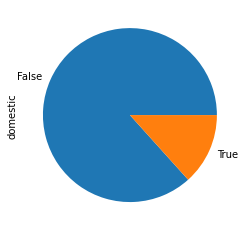

In [29]:
# for now, plot pie chart with domestic vs not-domestic
# dom_vs_not = sample.plot.pie(y='domestic')
# transform true/false of 'domestic' column with 0 and 1? 
dom_vs_not = sample['domestic'].value_counts().plot(kind='pie')
#dom_vs_not

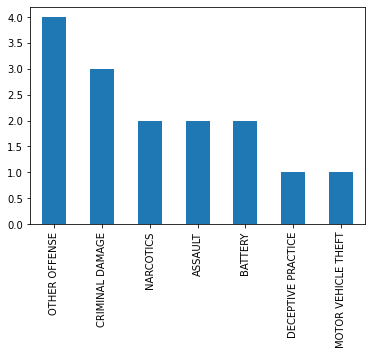

In [30]:
# plot chart with count of different types of crime
count_types = sample['primary_type'].value_counts().plot(kind='bar')

In [0]:
# add column to sample with violent vs non-violent crime, and make pie chart to compare 
# https://www.ucrdatatool.gov/offenses.cfm 
# UCR definition/ seperation of Part I crimes (serious crimes)
#  there are eight crimes, or Part I offenses, (murder and nonnegligent homicide, 
# rape (legacy & revised), robbery, aggravated assault, burglary, 
# motor vehicle theft, larceny-theft, and arson)

In [31]:
# look at all of the types of crime that appear 
df.primary_type.unique()

array(['THEFT', 'BATTERY', 'ROBBERY', 'CRIMINAL DAMAGE', 'OTHER OFFENSE',
       'ASSAULT', 'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION', 'NARCOTICS',
       'BURGLARY', 'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS',
       'CRIMINAL SEXUAL ASSAULT', 'OFFENSE INVOLVING CHILDREN',
       'CONCEALED CARRY LICENSE VIOLATION', 'HOMICIDE', 'SEX OFFENSE',
       'INTERFERENCE WITH PUBLIC OFFICER', 'ARSON', 'OBSCENITY',
       'STALKING', 'INTIMIDATION', 'PUBLIC PEACE VIOLATION',
       'PROSTITUTION', 'KIDNAPPING', 'PUBLIC INDECENCY', 'GAMBLING',
       'LIQUOR LAW VIOLATION', 'OTHER NARCOTIC VIOLATION',
       'HUMAN TRAFFICKING', 'CRIM SEXUAL ASSAULT'], dtype=object)

In [0]:
# need to fix - criminal sexual assualt and crim sexual assault 
df = df.replace('CRIM SEXUAL ASSAULT','CRIMINAL SEXUAL ASSAULT')

In [35]:
df.primary_type.unique()

array(['THEFT', 'BATTERY', 'ROBBERY', 'CRIMINAL DAMAGE', 'OTHER OFFENSE',
       'ASSAULT', 'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION', 'NARCOTICS',
       'BURGLARY', 'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS',
       'CRIMINAL SEXUAL ASSAULT', 'OFFENSE INVOLVING CHILDREN',
       'CONCEALED CARRY LICENSE VIOLATION', 'HOMICIDE', 'SEX OFFENSE',
       'INTERFERENCE WITH PUBLIC OFFICER', 'ARSON', 'OBSCENITY',
       'STALKING', 'INTIMIDATION', 'PUBLIC PEACE VIOLATION',
       'PROSTITUTION', 'KIDNAPPING', 'PUBLIC INDECENCY', 'GAMBLING',
       'LIQUOR LAW VIOLATION', 'OTHER NARCOTIC VIOLATION',
       'HUMAN TRAFFICKING'], dtype=object)

In [0]:
serious = ['THEFT','ROBBERY','BATTERY','KIDNAPPING','MOTOR VEHICLE THEFT','BURGLARY','CRIMINAL SEXUAL ASSAULT','HOMICIDE','ARSON']

In [0]:
# create column with serious crimes 
df['serious'] = [True if x in serious else False for x in df['primary_type']]

In [38]:
df

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,serious
0,12028211,JD206901,2020-04-11T02:00:00.000,018XX W 50TH ST,0820,THEFT,$500 AND UNDER,STREET,False,False,0931,009,15,61,06,1164746,1871527,2020,2020-04-18T15:47:37.000,41.803077553,-87.67132676,"{'latitude': '41.803077553', 'longitude': '-87...",True
1,12028467,JD207138,2020-04-11T18:56:00.000,080XX S WESTERN AVE,0460,BATTERY,SIMPLE,NURSING / RETIREMENT HOME,False,False,0835,008,18,70,08B,1161769,1851456,2020,2020-04-18T15:47:37.000,41.74806235,-87.682801662,"{'latitude': '41.74806235', 'longitude': '-87....",True
2,12029568,JD207999,2020-04-11T20:00:00.000,014XX N ELK GROVE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,1424,014,1,24,06,1163857,1910118,2020,2020-04-18T15:47:37.000,41.908993679,-87.673499516,"{'latitude': '41.908993679', 'longitude': '-87...",True
4,12028454,JD206887,2020-04-11T12:40:00.000,033XX W PALMER ST,031A,ROBBERY,ARMED - HANDGUN,ALLEY,False,False,1413,014,26,22,03,1153644,1914423,2020,2020-04-18T15:47:37.000,41.921016431,-87.710902698,"{'latitude': '41.921016431', 'longitude': '-87...",True
5,12028441,JD207123,2020-04-11T19:03:00.000,079XX S DR MARTIN LUTHER KING JR DR,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,0623,006,6,44,14,1180275,1852549,2020,2020-04-18T15:47:37.000,41.750657714,-87.614956494,"{'latitude': '41.750657714', 'longitude': '-87...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57800,11938236,JD100171,2020-01-01T02:45:00.000,021XX S OAKLEY AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,1234,012,25,31,08B,1161360,1889913,2020,2020-01-08T15:49:48.000,41.853601722,-87.68323458,"{'latitude': '41.853601722', 'longitude': '-87...",True
57801,11938964,JD101115,2020-01-01T21:23:00.000,042XX N BROADWAY,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1915,019,46,3,08B,1169146,1928470,2020,2020-01-08T15:49:48.000,41.959239131,-87.653535714,"{'latitude': '41.959239131', 'longitude': '-87...",True
57802,11941593,JD104025,2020-01-01T17:00:00.000,013XX N LOCKWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2532,025,37,25,14,1140776,1908599,2020,2020-01-08T15:49:48.000,41.905281287,-87.758326653,"{'latitude': '41.905281287', 'longitude': '-87...",False
57803,11938627,JD100716,2020-01-01T13:00:00.000,086XX S PHILLIPS AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,0423,004,7,46,26,1193996,1848162,2020,2020-01-08T15:49:48.000,41.738294048,-87.564820654,"{'latitude': '41.738294048', 'longitude': '-87...",False


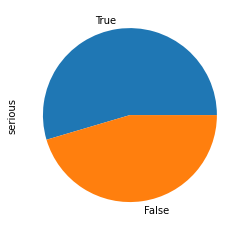

In [39]:
ser = df['serious'].value_counts().plot(kind='pie')
